In [1]:
import tweetclassifier as tc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
import datetime
from time import time

%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_colwidth',200)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

In [2]:
clf = tc.classifytweet()

Model items loaded and classifier initialized!


In [3]:
df = pd.read_csv('../data/data_cleaned_w_sentiment_outrage_counts_emoji.csv', sep=',', quotechar='"', index_col=False, header=0)
#df.drop(['text_token','text_stemmed','text_processed', 'text_tokenized'], inplace=True, axis=1)
df.head(1)

,user.description,text,topic,log_followers,log_retweets,engagement_flag,text_token,text_stemmed,text_processed,positive_emo,outrage_emo,net_emo_outrage,predicted_sentiment,negative_sentiment_prob,num_outrage_words_ext,num_outrage_words
0,"Part of the #VastRightWingConspiracy -- thanks, @HillaryClinton. Better candidate: https://www.randpaul.com/ Retweeting not endorsement. Image: TV lover.","#BanTheBox means ""all is #forgiven""/NO MORE federal #NCIC checks when buying guns? Please consider it, Mr. President @POTUS. #forgiving",G,5.252273,0.0,0,"[u'#BanTheBox', u'means', u'""', u'all', u'is', u'#forgiven', u'""', u'/', u'NO', u'MORE', u'federal', u'#NCIC', u'checks', u'when', u'buying', u'guns', u'?', u'Please', u'consider', u'it', u',', u'...","[u'#banthebox', u'mean', u'""', u'all', u'is', u'#forgiven', u'""', u'/', u'no', u'more', u'feder', u'#ncic', u'check', u'when', u'buy', u'gun', u'?', u'pleas', u'consid', u'it', u',', u'mr', u'.', ...","#banthebox mean "" all is #forgiven "" / no more feder #ncic check when buy gun ? pleas consid it , mr . presid @potus . #forgiv",0,0,0,4,0.265578,0,0


In [8]:
cols = df.columns.tolist()
cols_to_add = ['topics','arousal','valence','topic_arousal','topic_valence']
cols = cols + cols_to_add
df_list = df.values.tolist()

In [9]:
t0 = time()
for ix,row in enumerate(df_list):
    if ix % 5000 == 0:
        elapsed = time() - t0
        print("Processing tweet number %s, time elapsed: %s" %(str(ix), str(datetime.timedelta(seconds=elapsed))))
    
    clf.prepare_tweet(row[1])
    topics = clf.get_topics()
    topic_arousal=0
    topic_valence=0
    for tup in topics:
        topic_arousal += clf.topic_arousal_scaler[tup[0]] * tup[1]
        topic_valence += clf.topic_valence_scaler[tup[0]] * tup[1]
    
    to_add = [topics,clf.get_arousal_score(), clf.get_valence_score(), topic_arousal, topic_valence]
    df_list[ix] = row + to_add

Processing tweet number 0, time elapsed: 0:00:00.000794
Processing tweet number 5000, time elapsed: 0:21:19.010156
Processing tweet number 10000, time elapsed: 0:41:33.126765
Processing tweet number 15000, time elapsed: 1:01:22.834129
Processing tweet number 20000, time elapsed: 1:22:26.650376
Processing tweet number 25000, time elapsed: 1:43:20.083854
Processing tweet number 30000, time elapsed: 2:04:24.441952
Processing tweet number 35000, time elapsed: 2:24:15.312259
Processing tweet number 40000, time elapsed: 2:44:15.107644
Processing tweet number 45000, time elapsed: 3:03:49.347820
Processing tweet number 50000, time elapsed: 3:23:41.630747
Processing tweet number 55000, time elapsed: 3:42:21.202047
Processing tweet number 60000, time elapsed: 3:59:50.716661
Processing tweet number 65000, time elapsed: 4:17:19.186694
Processing tweet number 70000, time elapsed: 4:34:47.862851
Processing tweet number 75000, time elapsed: 4:52:15.976346
Processing tweet number 80000, time elapsed: 

In [33]:
del df
df = pd.DataFrame(df_list, index=None, columns=cols)
df.head(1)

,user.description,text,topic,log_followers,log_retweets,engagement_flag,text_token,text_stemmed,text_processed,positive_emo,...,net_emo_outrage,predicted_sentiment,negative_sentiment_prob,num_outrage_words_ext,num_outrage_words,topics,arousal,valence,topic_arousal,topic_valence
0,"Part of the #VastRightWingConspiracy -- thanks, @HillaryClinton. Better candidate: https://www.randpaul.com/ Retweeting not endorsement. Image: TV lover.","#BanTheBox means ""all is #forgiven""/NO MORE federal #NCIC checks when buying guns? Please consider it, Mr. President @POTUS. #forgiving",G,5.252273,0.0,0,"[u'#BanTheBox', u'means', u'""', u'all', u'is', u'#forgiven', u'""', u'/', u'NO', u'MORE', u'federal', u'#NCIC', u'checks', u'when', u'buying', u'guns', u'?', u'Please', u'consider', u'it', u',', u'...","[u'#banthebox', u'mean', u'""', u'all', u'is', u'#forgiven', u'""', u'/', u'no', u'more', u'feder', u'#ncic', u'check', u'when', u'buy', u'gun', u'?', u'pleas', u'consid', u'it', u',', u'mr', u'.', ...","#banthebox mean "" all is #forgiven "" / no more feder #ncic check when buy gun ? pleas consid it , mr . presid @potus . #forgiv",0,...,0,4,0.265578,0,0,"[(13, 0.131051111386), (27, 0.425478586109), (46, 0.0979408002872), (50, 0.26775172444)]",3.994752,4.674877,0.509156,0.437681


In [34]:
arousal_scaler = MinMaxScaler().fit(df[np.isnan(df.arousal)==False].arousal.values.reshape(-1, 1))
topic_arousal_scaler = MinMaxScaler().fit(df.topic_arousal.values.reshape(-1, 1))
valence_scaler = MinMaxScaler().fit(df[np.isnan(df.valence)==False].valence.values.reshape(-1, 1))
topic_valence_scaler = MinMaxScaler().fit(df.topic_valence.values.reshape(-1, 1))
outrage_scaler = MinMaxScaler(feature_range=(0.5, 1)).fit(df.num_outrage_words.values.reshape(-1,1))
ext_outrage_scaler = MinMaxScaler(feature_range=(0.5, 1)).fit(df.num_outrage_words_ext.values.reshape(-1,1))

In [35]:
df.arousal.fillna(-600, inplace=True)
df.valence.fillna(-600, inplace=True)
df['scaled_arousal'] = arousal_scaler.transform(df.arousal.values.reshape(-1,1))
df['scaled_valence'] = valence_scaler.transform(df.valence.values.reshape(-1,1))
df['scaled_topic_arousal'] = topic_arousal_scaler.transform(df.topic_arousal.values.reshape(-1, 1))
df['scaled_topic_valence'] = topic_valence_scaler.transform(df.topic_valence.values.reshape(-1, 1))
df['scaled_outrage_words'] = outrage_scaler.transform(df.num_outrage_words.values.reshape(-1,1))
df['scaled_ext_outrage_words'] = ext_outrage_scaler.transform(df.num_outrage_words_ext.values.reshape(-1,1))

In [36]:
df[df.arousal==-600].scaled_arousal = 0.0
df[df.valence==-600].scaled_valence = 0.0
df[df.arousal==-600].arousal = 0.0
df[df.valence==-600].valence = 0.0

In [38]:
def outrageous(row):
    outrage = 0.15 * row.scaled_topic_valence + \
            0.14 * row.scaled_topic_arousal + \
            0.14 * row.scaled_arousal + \
            0.14 * row.scaled_valence + \
            0.12 * row.scaled_outrage_words + \
            0.11 * row.negative_sentiment_prob + \
            0.10 * row.net_emo_outrage + \
            0.10 * row.scaled_ext_outrage_words
    return outrage

In [41]:
df['outrage_score'] = 0.15 * df.scaled_topic_valence + 0.14 * df.scaled_topic_arousal + 0.14 * df.scaled_arousal + 0.14 * df.scaled_valence + 0.12 * df.scaled_outrage_words + 0.11 * df.negative_sentiment_prob + 0.10 * df.net_emo_outrage + 0.10 * df.scaled_ext_outrage_words

In [42]:
df.head()

,user.description,text,topic,log_followers,log_retweets,engagement_flag,text_token,text_stemmed,text_processed,positive_emo,...,valence,topic_arousal,topic_valence,scaled_arousal,scaled_valence,scaled_topic_arousal,scaled_topic_valence,scaled_outrage_words,scaled_ext_outrage_words,outrage_score
0,"Part of the #VastRightWingConspiracy -- thanks, @HillaryClinton. Better candidate: https://www.randpaul.com/ Retweeting not endorsement. Image: TV lover.","#BanTheBox means ""all is #forgiven""/NO MORE federal #NCIC checks when buying guns? Please consider it, Mr. President @POTUS. #forgiving",G,5.252273,0.0,0,"[u'#BanTheBox', u'means', u'""', u'all', u'is', u'#forgiven', u'""', u'/', u'NO', u'MORE', u'federal', u'#NCIC', u'checks', u'when', u'buying', u'guns', u'?', u'Please', u'consider', u'it', u',', u'...","[u'#banthebox', u'mean', u'""', u'all', u'is', u'#forgiven', u'""', u'/', u'no', u'more', u'feder', u'#ncic', u'check', u'when', u'buy', u'gun', u'?', u'pleas', u'consid', u'it', u',', u'mr', u'.', ...","#banthebox mean "" all is #forgiven "" / no more feder #ncic check when buy gun ? pleas consid it , mr . presid @potus . #forgiv",0,...,4.674877,0.509156,0.437681,0.390025,0.473302,0.540415,0.468386,0.000000,0.000000,0.295995
1,War Veteran who loves his country. Never forget those who died in 'Benghazi'. 864th Engineer Battalion (Combat) (Heavy),BOYCOTT NOV 4 @ABC @CMAwards &gt; THREAT TO ALL GUN OWNERS - BOYCOTT HIS MUSIC &gt; @TheTimMcGraw GUN CONTROL EXTREMIST https://t.co/xMuE2o7vV7 …,G,9.936148,0.0,0,"[u'BOYCOTT', u'NOV', u'4', u'@ABC', u'@CMAwards', u'>', u'THREAT', u'TO', u'ALL', u'GUN', u'OWNERS', u'-', u'BOYCOTT', u'HIS', u'MUSIC', u'>', u'@TheTimMcGraw', u'GUN', u'CONTROL', u'EXTREMIST', u...","[u'boycott', u'nov', u'4', u'@abc', u'@cmaward', u'>', u'threat', u'to', u'all', u'gun', u'owner', u'-', u'boycott', u'his', u'music', u'>', u'@thetimmcgraw', u'gun', u'control', u'extremist', u'h...",boycott nov 4 @abc @cmaward > threat to all gun owner - boycott his music > @thetimmcgraw gun control extremist https://t.co/xmue2o7vv7,0,...,4.928830,0.452194,0.388114,0.672070,0.508500,0.479957,0.415342,0.000000,0.000000,0.344268
2,"Retired: cowboy,truck driver Served in the USAF, hobbies include Shooting sports and hunt and camp born in Calif.and sadly left in 1984","Savage: This is the Most Corrupt, Degenerate, Criminal Gov’t in American History https://t.co/qW12kzuBWH Take my guns lead first.",G,4.043051,0.0,0,"[u'Savage', u':', u'This', u'is', u'the', u'Most', u'Corrupt', u',', u'Degenerate', u',', u'Criminal', u'Gov', u'', u't', u'in', u'American', u'History', u'https://t.co/qW12kzuBWH', u'Take', u'my'...","[u'savag', u':', u'this', u'is', u'the', u'most', u'corrupt', u',', u'degener', u',', u'crimin', u'gov', u'', u't', u'in', u'american', u'histori', u'https://t.co/qw12kzubwh', u'take', u'my', u'gu...","savag : this is the most corrupt , degener , crimin gov t in american histori https://t.co/qw12kzubwh take my gun lead first .",0,...,4.056568,0.561770,0.448325,0.564619,0.387605,0.596259,0.479777,0.166667,0.333333,0.406247
3,Bartender...Bouncer...Autobody......Gravedigger.....Supermodal......OG.....Playboy.........:)\r\n\r\n\r\nDAM...NICE...GUY...MAFIA DEMOLITION INSTALATION,Guns N' Roses - November Rain https://t.co/w2pHuG0QBa via @YouTube,G,6.107023,0.0,0,"[u'Guns', u'N', u""'"", u'Roses', u'-', u'November', u'Rain', u'https://t.co/w2pHuG0QBa', u'via', u'@YouTube']","[u'gun', u'n', u""'"", u'rose', u'-', u'novemb', u'rain', u'https://t.co/w2phug0qba', u'via', u'@youtub']",gun n ' rose - novemb rain https://t.co/w2phug0qba via @youtub,0,...,3.660000,0.366642,0.284557,1.000000,0.332640,0.389152,0.304520,0.000000,0.000000,0.338483
4,Ming doesn't have a trajectory problem.,"I'll say it again: #Tarantino was merely correct. And, to his credit, he's sticking to his rhetorical guns. #BadCops https://t.co/7M4uTpXwyc",G,5.081404,0.0,0,"[u""I'll"", u'say', u'it', u'again', u':', u'#Tarantino', u'was', u'merely', u'correct', u'.'

In [43]:
df.to_csv('outrage_data.csv', index=False)

In [44]:
import pickle

pickle.dump(arousal_scaler, open('model_files/arousal_scaler.pkl', 'wb'))
pickle.dump(topic_arousal_scaler, open('model_files/topic_arousal_scaler.pkl', 'wb'))
pickle.dump(valence_scaler, open('model_files/valence_scaler.pkl', 'wb'))
pickle.dump(topic_valence_scaler, open('model_files/topic_valence_scaler.pkl', 'wb'))
pickle.dump(outrage_scaler, open('model_files/outrage_scaler.pkl', 'wb'))
pickle.dump(ext_outrage_scaler, open('model_files/ext_outrage_scaler.pkl', 'wb'))

In [ ]:
df.outrage_score = 0.16 * (1 - df.scaled_topic_valence) + \
    0.16 * df.scaled_topic_arousal + \
    0.15 * (1 - df.scaled_valence) + \
    0.14 * df.scaled_arousal + \
    0.14 * df.scaled_outrage_words + \
    0.13 * df.negative_sentiment_prob + \
    0.12 * df.scaled_ext_outrage_words + \
    0.0 * df.net_emo_outrage

In [ ]:
df.to_csv('outrage_data_final.csv', index=False)

In [47]:
topic_arousal = pickle.load(open('model_files/topic_arousal_scaled.pkl', 'rb'))
topic_valence = pickle.load(open('model_files/topic_valence_scaled.pkl', 'rb'))

In [48]:
topic_arousal.shape

(60,)

In [53]:
plt.style.use('seaborn')
from matplotlib import cm

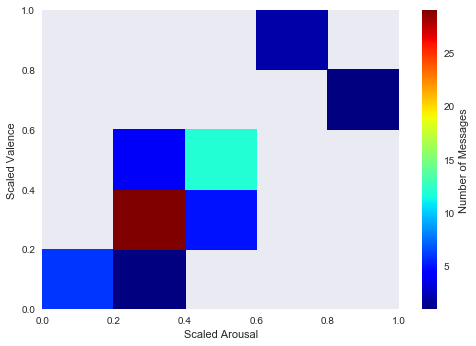

In [56]:
# Estimate the 2D histogram
nbins = 5
H, xedges, yedges = np.histogram2d(topic_arousal, topic_valence, bins=nbins)
 
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
 
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
# Plot 2D histogram using pcolor
fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked, cmap=cm.jet)
plt.xlabel('Scaled Arousal')
plt.ylabel('Scaled Valence')
cbar = plt.colorbar(cmap=cm.jet)
cbar.ax.set_ylabel('Number of Messages')

plt.savefig('ValenceArousalDistribution.png', dpi=300)
plt.show()

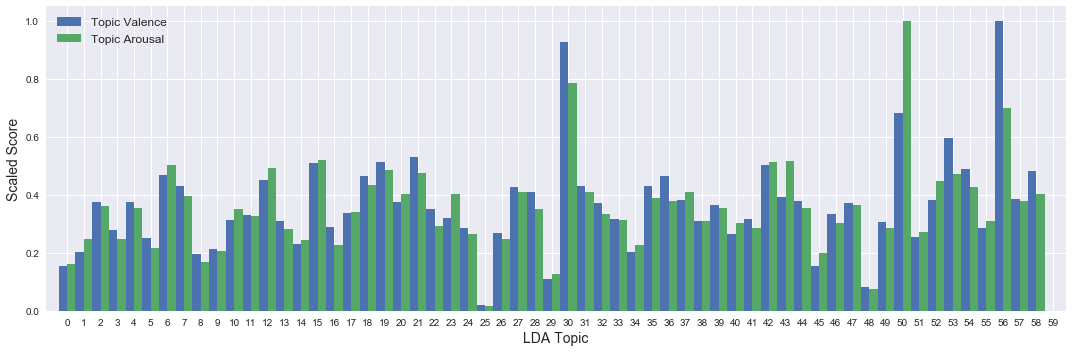

In [67]:
index = np.arange(60)
bar_width = 0.5
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

rects1 = plt.bar(index, topic_valence, bar_width, label='Topic Valence')
rects2 = plt.bar(index+bar_width, topic_arousal, bar_width, label='Topic Arousal')

plt.xlim(-1,60)
plt.xlabel('LDA Topic', fontsize=14)
plt.ylabel('Scaled Score', fontsize=14)
plt.xticks(index + bar_width / 2, index)
plt.legend(fontsize=12)

plt.tight_layout()

plt.savefig('TopicVADistribution.png', dpi=300)
plt.show()

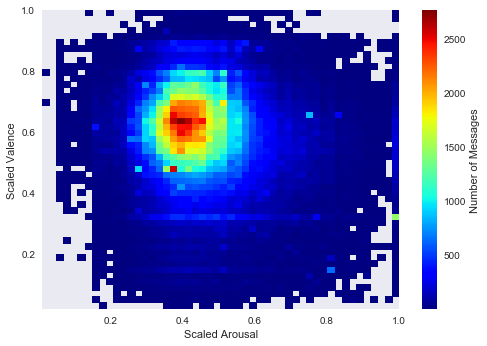

In [68]:
# Estimate the 2D histogram
nbins = 50
H, xedges, yedges = np.histogram2d(df[df.scaled_arousal>0].scaled_arousal.values, df[df.scaled_valence>0].scaled_valence.values, bins=nbins)
 
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
 
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
# Plot 2D histogram using pcolor
fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked, cmap=cm.jet)
plt.xlabel('Scaled Arousal')
plt.ylabel('Scaled Valence')
cbar = plt.colorbar(cmap=cm.jet)
cbar.ax.set_ylabel('Number of Messages')

plt.savefig('ValenceArousalDistribution.png', dpi=300)
plt.show()